#  <center><span style="color:blue;font-family: serif">Model Evaluation</span></center>
<center><table>
                    <tr style="background-color: yellow;">
                        <th>Author name</th>
                        <th>Company name</th>
                    </tr>
                    <tr>
                        <td>Abdellatif BELMADY</td> <td> Other Ways </td>
                    </tr>
                   
                
</table></center>

#  <b>Summary</b>



> Evaluation Metrics


> Precision and Recall


> Calculating Metrics in Scikit-learn


> Training and Testing


> Foundations for the ROC Curve


> The ROC Curve


> k-fold Cross Validation


> k-fold Cross Validation in Sklearn


> Model Comparison



















## Evaluation Metrics

### <b>Accuracy</b>

Accuracy is the percent of predictions that are correct.

If you have 100 datapoints and predict 70 of them correctly and 30 incorrectly, the accuracy is 70%.

Accuracy is a very straightforward and easy to understand metric, however it’s not always the best one. For example, let’s say I have a model to predict whether a credit card charge is fraudulent. Of 10000 credit card chards, we have 9900 legitimate charges and 100 fraudulent charges. I could build a model that just predicts that every single charge is legitimate and it would get 9900/10000 (99%) of the predictions correct!

Accuracy is a good measure if our classes are evenly split, but is very misleading if we have imbalanced classes.

✅ Always use caution with accuracy. You need to know the distribution of the classes to know how to interpret the value.

### <b>Confusion Matrix</b>

As we noticed in the previous part, we care not only about how many datapoints we predict the correct class for, we care about how many of the positive datapoints we predict correctly for as well as how many of the negative datapoints we predict correctly.

We can see all the important values in what is called the Confusion Matrix (or Error Matrix or Table of Confusion).

The Confusion Matrix is a table showing four values:
• Datapoints we predicted positive that are actually positive
• Datapoints we predicted positive that are actually negative
• Datapoints we predicted negative that are actually positive
• Datapoints we predicted negative that are actually negative

The first and fourth are the datapoints we predicted correctly and the second and third are the datapoints we predicted incorrectly.

In our Titanic dataset, we have 887 passengers, 342 survived (positive) and 545 didn’t survive (negative). The model we built in the previous module has the following confusion matrix.

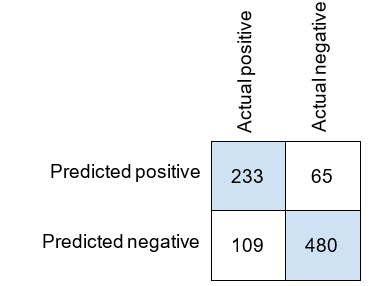

The blue shaded squares are the counts of the predictions that we got correct. So of the 342 passengers that survived, we predicted 233 or them correctly (and 109 of them incorrectly). Of the 545 passengers that didn’t survive, we predicted 480 correctly (and 65 incorrectly).

We can use the confusion matrix to compute the accuracy. As a reminder, the accuracy is the number of datapoints predicted correctly divided by the total number of datapoints.



```
(233+480)/(233+65+109+480) = 713/887 = 80.38%
```



This is indeed the same value we got in the previous module.

✅ The confusion matrix fully describes how a model performs on a dataset, though is difficult to use to compare models.

### <b>True Positives, True Negatives, False Positives, False Negatives</b>

We have names for each square of the confusion matrix.

A true positive (TP) is a datapoint we predicted positively that we were correct about.
A true negative (TN) is a datapoint we predicted negatively that we were correct about.
A false positive (FP) is a datapoint we predicted positively that we were incorrect about.
A false negative (FN) is a datapoint we predicted negatively that we were incorrect about.

The terms can be a little hard to keep track of. The way to remember is that the second word is what our prediction is (positive or negative) and the first word is whether that prediction was correct (true or false).

You’ll often see the confusion matrix described as follows:

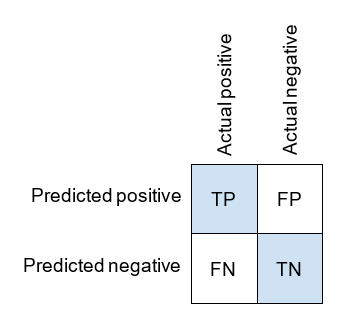

✅ The four values of the confusion matrix (TP, TN, FP, FN) are used to compute several different metrics that we’ll use later on.

## Precision and Recall

### <b>Precision</b>

Two commonly used metrics for classification are precision and recall. Conceptually, precision refers to the percentage of positive results which are relevant and recall to the percentage of positive cases correctly classified.

Both can be defined using quadrants from the confusion matrix, which we recall is as follows:

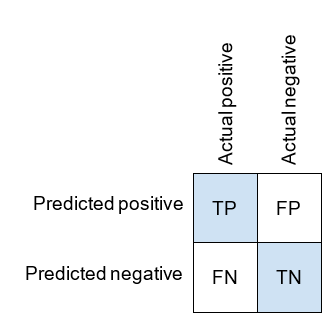

Precision is the percent of the model’s positive predictions that are correct. We define it as follows:

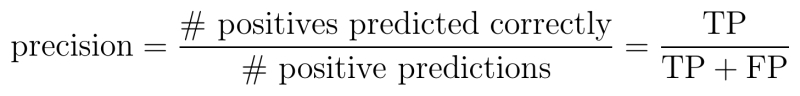

If we look at our confusion matrix for our model for the Titanic dataset, we can calculate the precision.

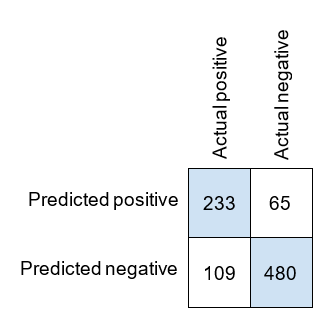



```
precision = 233 / (233 + 65) = 0.7819
```



✅ Precision is a measure of how precise the model is with its positive predictions.

### <b>Recall</b>

Recall is the percent of positive cases that the model predicts correctly. Again, we will be using the confusion matrix to compute our result.

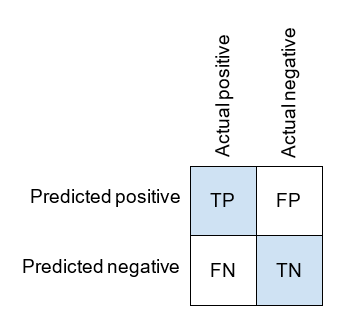

Here we mathematically define the recall:

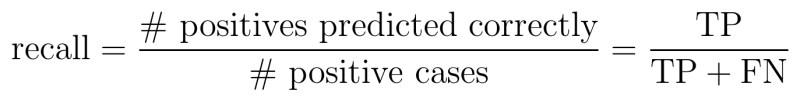

Let’s calculate the recall for our model for the Titanic dataset.

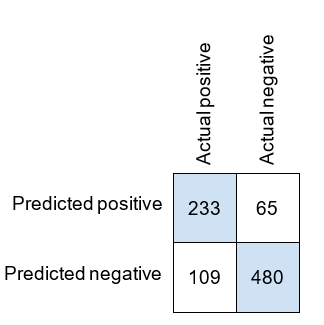

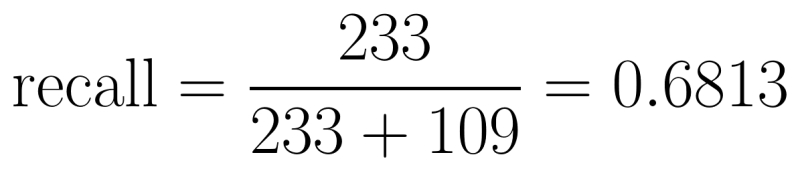

✅ Recall is a measure of how many of the positive cases the model can recall.

### <b>Precision & Recall Trade-off</b>

We often will be in a situation of choosing between increasing the recall 
(while lowering the precision) or increasing the precision (and lowering the recall). It will depend on the situation which we’ll want to maximize.

For example, let’s say we’re building a model to predict if a credit card charge is fraudulent. The positive cases for our model are fraudulent charges and the negative cases are legitimate charges.

Let’s consider two scenarios:

1. If we predict the charge is fraudulent, we’ll reject the charge.
2. If we predict the charge is fraudulent, we’ll call the customer to confirm the charge.

In case 1, it’s a huge inconvenience for the customer when the model predicts fraud incorrectly (a false positive). In case 2, a false positive is a minor inconvenience for the customer.

The higher the false positives, the lower the precision. Because of the high cost to false positives in the first case, it would be worth having a low recall in order to have a very high precision. In case 2, you would want more of a balance between precision and recall.

✅ There’s no hard and fast rule on what values of precision and recall you’re shooting for. It always depends on the dataset and the application.

### <b>F1 Score</b>

Accuracy was an appealing metric because it was a single number. Precision and recall are two numbers so it’s not always obvious how to choose between two models if one has a higher precision and the other has a higher recall. The F1 score is an average of precision and recall so that we have a single score for our model.

Here’s the mathematical formula for the F1 score.

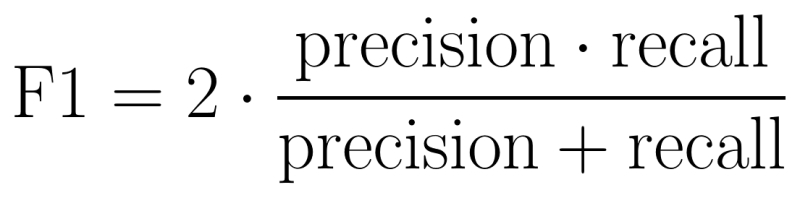

Let’s calculate the F1 score for our model for the Titanic dataset.

We’ll use the precision and recall numbers that we previously calculated. The precision is 0.7819 and the recall is 0.6813.

The F1 score is as follows.



```
2 (0.7819) (0.6813) / (0.7819 + 0.6813) = 0.7281
```



✅ The F1 score is the harmonic mean of the precision and recall values.

## Calculating Metrics in Scikit-learn

### <b>Accuracy, Precision, Recall & F1 Score in Sklearn</b>

Scikit-learn has a function built in for each of the metrics that we have introduced. We have a separate function for each of the accuracy, precision, recall and F1 score.

In order to use them, let’s start by recalling our code from the previous module to build a Logistic Regression model. The code reads in the Titanic dataset from the csv file and puts it in a Pandas DataFrame. Then we create a feature matrix X and target values y. We create a Logistic Regression model and fit it to our dataset. Finally, we create a variable y_pred of our predictions.



```
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)
```



Now we’re ready to use our metric functions. Let’s import them from scikit-learn.




```
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
```



Each function takes two 1-dimensional numpy arrays: the true values of the target & the predicted values of the target. We have the true values of the target and the predicted values of the target. Thus we can use the metric functions as follows.

⏸ Run this code to see the results:

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)

print("accuracy:", accuracy_score(y, y_pred))
print("precision:", precision_score(y, y_pred))
print("recall:", recall_score(y, y_pred))
print("f1 score:", f1_score(y, y_pred))

We see that the accuracy is 80% which means that 80% of the model’s predictions are correct. The precision is 78%, which we recall is the percent of the model’s positive predictions that are correct. The recall is 68%, which is the percent of the positive cases that the model predicted correctly. The F1 score is 73%, which is an average of the precision and recall.

✅ With a single model, the metric values do not tell us a lot. For some problems a value of 60% is good, and for others a value of 90% is good, depending on the difficulty of the problem. We will use the metric values to compare different models to pick the best one.

### <b>Confusion Matrix in Sklearn</b>

Scikit-learn has a confusion matrix function that we can use to get the four values in the confusion matrix (true positives, false positives, false negatives, and true negatives). Assuming y is our true target values and y_pred is the predicted values, we can use the confusion_matrix function as follows:

⏸ Run this code to see the results:

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(confusion_matrix(y, y_pred))

Scikit-learn reverses the confusion matrix to show the negative counts first! Here is how this confusion matrix should be labeled.

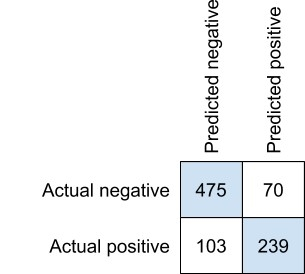

This is how we would typically draw the confusion matrix.

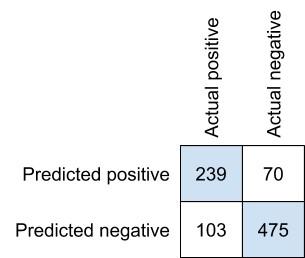

✅ Since negative target values correspond to 0 and positive to 1, scikit-learn has ordered them in this order. Make sure you double check that you are interpreting the values correctly!

## Training and Testing

### <b>Overfitting</b>

So far we’ve built a model with all of our data and then seen how well it performed on the same data. This is artificially inflating our numbers since our model, in effect, got to see the answers to the quiz before we gave it the quiz. This can lead to what we call overfitting. Overfitting is when we perform well on the data the model has already seen, but we don’t perform well on new data.

We can visually see an overfit model as follows. The line is too closely trying to get every single datapoint on the correct side of the line but it is missing the essence of the data.

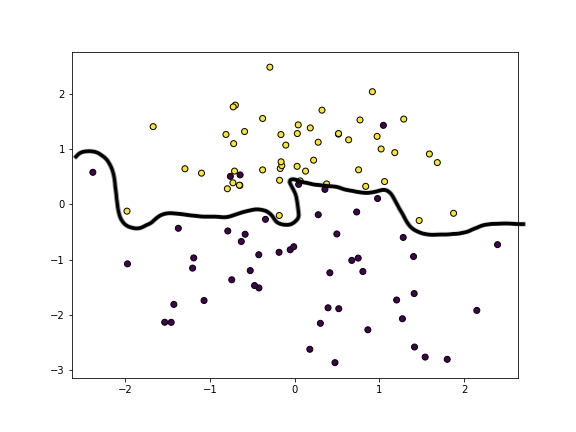

In the graph you can see that we’ve done a pretty good job of getting the yellow dots on the top and the purple dots on the bottom, but it isn’t capturing what’s going on. A single outlier point could really throw off the location of the line. While the model would get a great score on the data it’s already seen, it’s unlikely to perform well on new data.

✅ The more features we have in our dataset, the more prone we’ll be to overfitting.

### <b>Training Set and Test Set</b>

To give a model a fair assessment, we’d like to know how well our data would perform on data it hasn’t seen yet.

In action, our model will be making predictions on data we don’t know the answer to, so we’d like to evaluate how well our model does on new data, not just the data it’s already seen. To simulate making predictions on new unseen data, we can break our dataset into a training set and a test set. The training set is used for building the models. The test set is used for evaluating the models. We split our data before building the model, thus the model has no knowledge of the test set and we’ll be giving it a fair assessment.

If our dataset has 200 datapoints in it, breaking it into a training set and test set might look as follows.

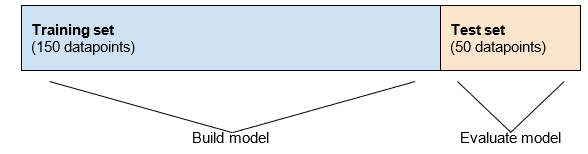

✅ A standard breakdown is to put 70-80% of our data in the training set and 20-30% in the test set. Using less data in the training set means that our model won’t have as much data to learn from, so we want to give it as much as possible while still leaving enough for evaluation.

### <b>Training and Testing in Sklearn</b>

Scikit-learn has a function built in for splitting the data into a training set and a test set.

Assuming we have a 2-dimensional numpy array X of our features and a 1-dimensional numpy array y of the target, we can use the train_test_split function. It will randomly put each datapoint in either the training set or the test set. By default the training set is 75% of the data and the test set is the remaining 25% of the data.



```
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
```



Let’s use the shape attribute to see the sizes of our datasets.



```
print("whole dataset:", X.shape, y.shape)
print("training set:", X_train.shape, y_train.shape)
print("test set:", X_test.shape, y_test.shape)
```



⏸ Run this code to see the results:

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

print("whole dataset:", X.shape, y.shape)
print("training set:", X_train.shape, y_train.shape)
print("test set:", X_test.shape, y_test.shape)

We can see that of the 887 datapoints in our dataset, 665 of them are in our training set and 222 are in the test set. Every datapoint from our dataset is used exactly once, either in the training set or the test set. Note that we have 6 features in our dataset, so we still have 6 features in both our training set and test set.

✅ We can change the size of our training set by using the train_size parameter. E.g. train_test_split(X, y, train_size=0.6) would put 60% of the data in the training set and 40% in the test set.

### <b>Building a Scikit-learn Model Using a Training Set</b>

Now that we know how to split our data into a training set and a test set, we need to modify how we build and evaluate the model. All of the model building is done with the training set and all of the evaluation is done with the test set.

In the last module, we built a model and evaluated it on the same dataset. Now we build the model using the training set.



```
model = LogisticRegression()
model.fit(X_train, y_train)
```



And we evaluate the model using the test set.



```
print(model.score(X_test, y_test))
```



In fact, all of the metrics we calculate in the previous parts should be calculated on the test set.

⏸ Run this code to see the results:

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

# building the model
model = LogisticRegression()
model.fit(X_train, y_train)

# evaluating the model
# print("accuracy:", model.score(X_test, y_test))
y_pred = model.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
print("f1 score:", f1_score(y_test, y_pred))

Our accuracy, precision, recall and F1 score values are actually very similar to the values when we used the entire dataset. This is a sign our model is not overfit!

✅ If you run the code, you’ll notice that you get different scores each time. This is because the train test split is done randomly, and depending which points land in the training set and test, the scores will be different. We’ll see when we get to the cross validation lesson that we have more accurate means of measuring these scores.

### <b>Using a Random State</b>

As we noticed in the previous part, when we randomly split the data into a training set and a test set, we end up with different datapoints in each set each time we run the code. This is a result of randomness, and we need it to be random for it to be effective, but this can sometimes make it difficult to test the code.

For example, each time we run the following code, we will get different results.

⏸ Run this code to see the results:

In [ ]:
from sklearn.model_selection import train_test_split

X = [[1, 1], [2, 2], [3, 3], [4, 4]]
y = [0, 0, 1, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train', X_train)
print('X_test', X_test)

To get the same split every time, we can use the random_state attribute. We choose an arbitrary number to give it, and then every time we run the code, we will get the same split.

⏸ Run this code to see the results:

In [ ]:
from sklearn.model_selection import train_test_split

X = [[1, 1], [2, 2], [3, 3], [4, 4]]
y = [0, 0, 1, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27)
print('X_train', X_train)
print('X_test', X_test)

✅ The random state is also called a seed.

## Foundations for the ROC Curve

### <b>Logistic Regression Threshold</b>

If you recall in Lesson 2, we talked about the trade-off between precision and recall. With a <b>Logistic Regression</b> model, we have an easy way of shifting between emphasizing precision and emphasizing recall. The Logistic Regression model doesn’t just return a prediction, but it returns a probability value between 0 and 1. Typically, we say if the value is >=0.5, we predict the passenger survived, and if the value is < 0.5, the passenger didn’t survive. However, we could choose any threshold between 0 and 1.

If we make the threshold higher, we’ll have fewer positive predictions, but our positive predictions are more likely to be correct. This means that the precision would be higher and the recall lower. On the other hand, if we make the threshold lower, we’ll have more positive predictions, so we’re more likely to catch all the positive cases. This means that the recall would be higher and the precision lower.

✅ Each choice of a threshold is a different model. An ROC (Receiver operating characteristic) Curve is a graph showing all of the possible models and their performance.

### <b>Sensitivity & Specificity</b>

An ROC Curve is a graph of the <b>sensitivity</b> vs. the <b>specificity</b>. These values demonstrate the same trade-off that precision and recall demonstrate.

Let’s look back at the Confusion Matrix, as we’ll be using it to define sensitivity and specificity.

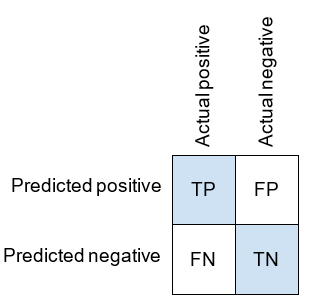

The sensitivity is another term for the recall, which is the true positive rate. Recall that it is calculated as follows:

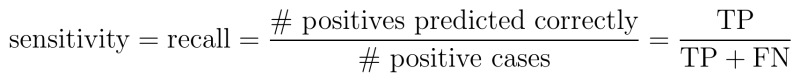

The specificity is the true negative rate. It’s calculated as follows.

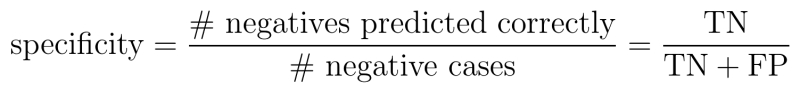

We’ve done a train test split on our Titanic dataset and gotten the following confusion matrix. We have 96 positive cases and 126 negative cases in our test set.

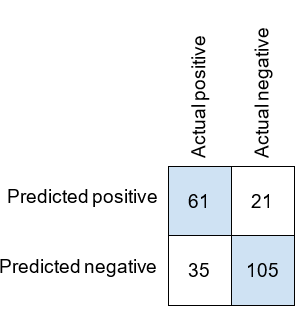

Let’s calculate the sensitivity and specificity.



```
Sensitivity = 61/96 = 0.6354
Specificity = 105/126 = 0.8333
```



The goal is to maximize these two values, though generally making one larger makes the other lower. It will depend on the situation whether we put more emphasis on sensitivity or specificity.

✅ While we generally look at precision and recall values, for graphing the standard is to use the sensitivity and specificity. It is possible to build a precision-recall curve, but this isn’t commonly done.

### <b>Sensitivity & Specificity in Scikit-learn</b>

Scikit-learn has not defined functions for sensitivity and specificity, but we can do it ourselves. Sensitivity is the same as recall, so it is easy to define.



```
from sklearn.metrics import recall_score
sensitivity_score = recall_score
print(sensitivity_score(y_test, y_pred)) 
# 0.6829268292682927
```



Now, to define specificity, if we realize that it is also the recall of the negative class, we can get the value from the sklearn function precision_recall_fscore_support.

Let’s look at the output of precision_recall_fscore_support.



```
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y, y_pred))
```



The second array is the recall, so we can ignore the other three arrays. There are two values. The first is the recall of the negative class and the second is the recall of the positive class. The second value is the standard recall or sensitivity value, and you can see the value matches what we got above. The first value is the specificity. So let’s write a function to get just that value.



```
def specificity_score(y_true, y_pred):
    p, r, f, s = precision_recall_fscore_support(y_true, y_pred)
    return r[0]
print(specificity_score(y_test, y_pred)) 
# 0.9214285714285714
```



Note that in the code sample we use a random state in the train test split so that every time you run the code you will get the same results.

⏸ Run this code to see the results:

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_recall_fscore_support

sensitivity_score = recall_score
def specificity_score(y_true, y_pred):
    p, r, f, s = precision_recall_fscore_support(y_true, y_pred)
    return r[0]

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("sensitivity:", sensitivity_score(y_test, y_pred))
print("specificity:", specificity_score(y_test, y_pred))

✅ Sensitivity is the same as the recall (or recall of the positive class) and specificity is the recall of the negative class.

### <b>Adjusting the Logistic Regression Threshold in Sklearn</b>

When you use scikit-learn’s predict method, you are given 0 and 1 values of the prediction. However, behind the scenes the Logistic Regression model is getting a probability value between 0 and 1 for each datapoint and then rounding to either 0 or 1. If we want to choose a different threshold besides 0.5, we’ll want those probability values. We can use the <b>predict_proba</b> function to get them.



```
model.predict_proba(X_test)
```



The result is a numpy array with 2 values for each datapoint (e.g. [0.78, 0.22]). You’ll notice that the two values sum to 1. The first value is the probability that the datapoint is in the 0 class (didn’t survive) and the second is the probability that the datapoint is in the 1 class (survived). We only need the second column of this result, which we can pull with the following numpy syntax.



```
model.predict_proba(X_test)[:, 1]
```



Now we just want to compare these probability values with our threshold. Say we want a threshold of 0.75. We compare the above array to 0.75. This will give us an array of True/False values which will be our array of predicted target values.



```
y_pred = model.predict_proba(X_test)[:, 1] > 0.75
```



A threshold of 0.75 means we need to be more confident in order to make a positive prediction. This results in fewer positive predictions and more negative predictions.

Now we can use any scikit-learn metrics from before using y_test as our true values and y_pred as our predicted values.



```
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
```



⏸ Run this code to see the results:

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:, 1] > 0.75

print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))

✅ Setting the threshold to 0.5 we would get the original Logistic Regression model. Any other threshold value yields an alternative model.

## The ROC Curve

### <b>How to Build an ROC Curve</b>

The ROC curve is a graph of the <b>specificity</b> vs the <b>sensitivity</b>. We build a Logistic Regression model and then calculate the specificity and sensitivity for every possible threshold. Every predicted probability is a threshold. If we have 5 datapoints with the following predicted probabilities: 0.3, 0.4, 0.6, 0.7, 0.8, we would use each of those 5 values as a threshold.

Note that we actually plot the sensitivity vs (1-specificity). There is no strong reason for doing it this way besides that it’s the standard.

Let’s start by looking at the code to build the ROC curve. Scikit-learn has a roc_curve function we can use. The function takes the true target values and the predicted probabilities from our model.

We first use the predict_proba method on the model to get the probabilities. Then we call the roc_curve function. The roc_curve function returns an array of the false positive rates, an array of the true positive rates and the thresholds. The false positive rate is 1-specificity (x-axis) and the true positive rate is another term for the sensitivity (y-axis). The threshold values won’t be needed in the graph.

Here’s the code for plotting the ROC curve in matplotlib. Note that we also have code for plotting a diagonal line. This can help us visually see how far our model is from a model that predicts randomly.

We assume that we already have a dataset that has been split into a training set and test set.



```
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()
```



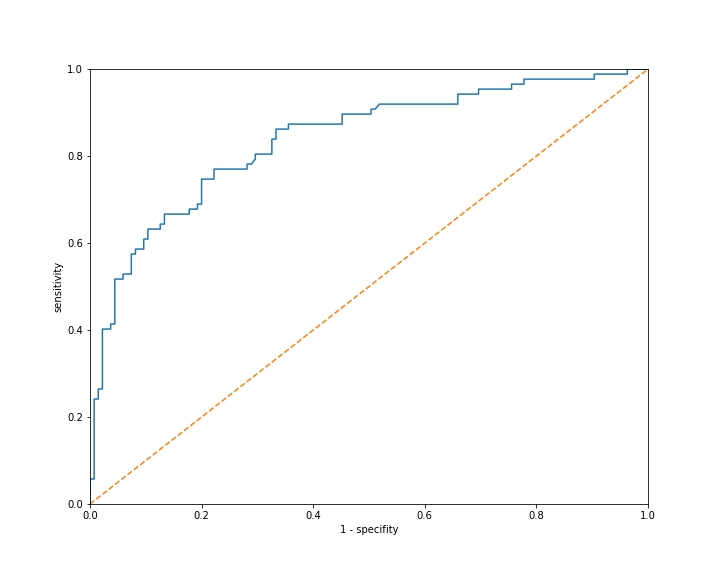

✅ As we don’t use the threshold values to build the graph, the graph does not tell us what threshold would yield each of the possible models.

### <b>ROC Curve Interpretation</b>

The ROC curve is showing the performance, not of a single model, but of many models. Each choice of threshold is a different model.

Let’s look at our ROC curve with these points highlighted.

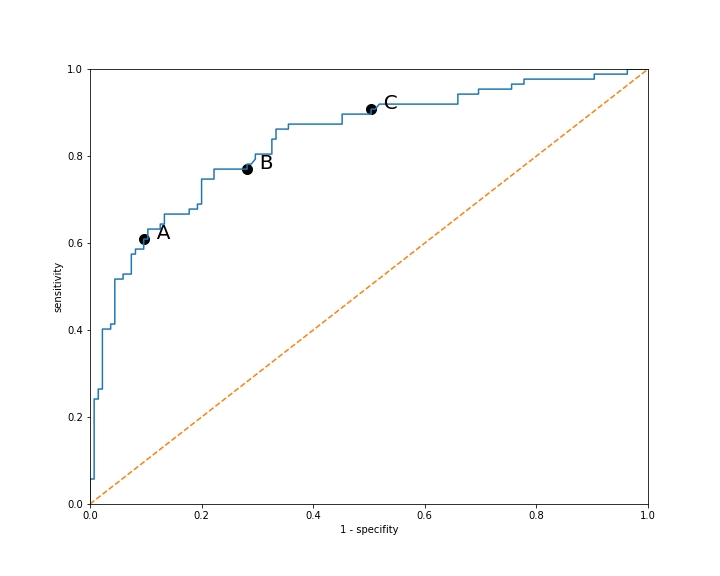

Each point A, B & C refers to a model with a different threshold.

Model A has a sensitivity of 0.6 and a specificity of 0.9 (recall that the graph is showing 1-specificity).
Model B has a sensitivity of 0.8 and a specificity of 0.7.
Model C has a sensitivity of 0.9 and a specificity of 0.5.

How to choose between these models will depend on the specifics of our situation.

✅ The closer the curve gets to the upper left corner, the better the performance. The line should never fall below the diagonal line as that would mean it performs worse than a random model.

### <b>Picking a Model from the ROC Curve</b>

When we’re ready to finalize our model, we have to choose a single threshold that we’ll use to make our predictions. The ROC curve is a way of helping us choose the ideal threshold for our problem.

Let’s again look at our ROC curve with three points highlighted:

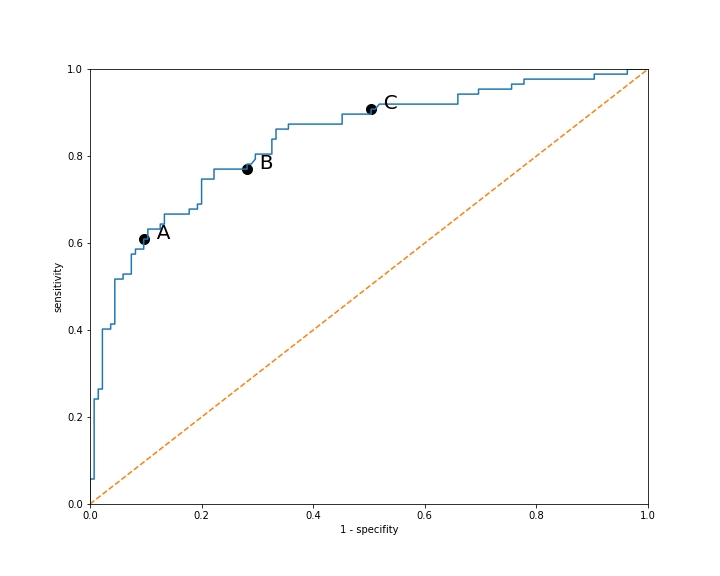

If we are in a situation where it’s more important that all of our positive predictions are correct than that we catch all the positive cases (meaning that we predict most of the negative cases correctly), we should choose the model with higher specificity (model A).

If we are in a situation where it’s important that we catch as many of the positive cases as possible, we should choose the model with the higher sensitivity (model C).

If we want a balance between sensitivity and specificity, we should choose model B.

✅ It can be tricky keeping track of all these terms. Even experts have to look them up again to ensure they are interpreting the values correctly.

### <b>Area Under the Curve</b>

We’ll sometimes what to use the ROC curve to compare two different models. Here is a comparison of the ROC curves of two models.

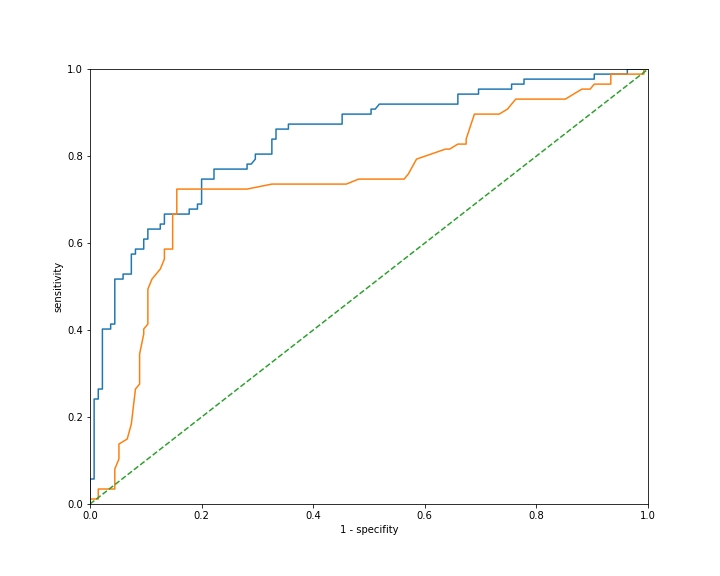

You can see that the blue curve outperforms the orange one since the blue line is almost always above the orange line.

To get an empirical measure of this, we calculate the Area Under the Curve, also called the AUC. This is the area under the ROC curve. It’s a value between 0 and 1, the higher the better.

Since the ROC is a graph of all the different Logistic Regression models with different thresholds, the AUC does not measure the performance of a single model. It gives a general sense of how well the Logistic Regression model is performing. To get a single model, you still need to find the optimal threshold for your problem.

Let’s use scikit-learn to help us calculate the area under the curve. We can use the roc_auc_score function.



```
roc_auc_score(y_test, y_pred_proba[:,1]) 
```



Here are the values for the two lines:



```
Blue AUC: 0.8379
Orange AUC: 0.7385
```



You can see empirically that the blue is better.

We can use the roc_auc_score function to calculate the AUC score of a Logistic Regression model on the Titanic dataset. We build two Logistic Regression models, model1 with 6 features and model2 with just Pclass and male features. We see that the AUC score of model1 is higher.

⏸ Run this code to see the results:

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred_proba1 = model1.predict_proba(X_test)
print("model 1 AUC score:", roc_auc_score(y_test, y_pred_proba1[:, 1]))

model2 = LogisticRegression()
model2.fit(X_train[:, 0:2], y_train)
y_pred_proba2 = model2.predict_proba(X_test[:, 0:2])
print("model 1 AUC score:", roc_auc_score(y_test, y_pred_proba2[:, 1]))

✅ It’s important to note that this metric tells us how well in general a Logistic Regression model performs on our data. As an ROC curve shows the performance of multiple models, the AUC is not measuring the performance of a single model.

## k-fold Cross Validation

### <b>Concerns with Training and Test Set</b>

We are doing evaluation because we want to get an accurate measure of how well the model performs. If our dataset is small, our test set is going to be small. Thus it might not be a good random assortment of datapoints and by random chance end up with easy or difficult datapoints in our evaluation set.

Since our goal is to get the best possible measure of our metrics (accuracy, precision, recall and F1 score), we can do a little better than just a single training and test set.

Recall that our training and test set split looks as follows.

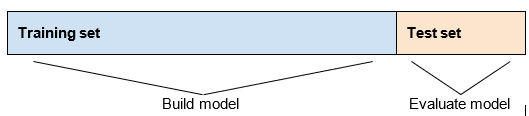

As we can see, all the values in the training set are never used to evaluate. It would be unfair to build the model with the training set and then evaluate with the training set, but we are not getting as full a picture of the model performance as possible.

To see this empirically, let’s try running the code from Lesson 3 which does a train/test split. We’ll re-run it a few times and see the results. Each row is the result of a different random train/test split.

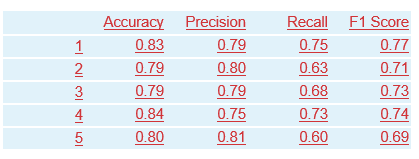

You can see that each time we run it, we get different values for the metrics. The accuracy ranges from 0.79 to 0.84, the precision from 0.75 to 0.81 and the recall from 0.63 to 0.75. These are wide ranges that just depend on how lucky or unlucky we were in which datapoints ended up in the test set.

Here’s the code if you want to try running yourself and seeing the varying values of the metrics.

⏸ Run this code to see the results:

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

# building the model
model = LogisticRegression()
model.fit(X_train, y_train)

# evaluating the model
y_pred = model.predict(X_test)
print(" accuracy: {0:.5f}".format(accuracy_score(y_test, y_pred)))
print("precision: {0:.5f}".format(precision_score(y_test, y_pred)))
print("   recall: {0:.5f}".format(recall_score(y_test, y_pred)))
print(" f1 score: {0:.5f}".format(f1_score(y_test, y_pred)))

✅ Instead of doing a single train/test split, we’ll split our data into a training set and test set multiple times.

### <b>Multiple Training and Test Sets</b>

We learned in the previous part that depending on our test set, we can get different values for the evaluation metrics. We want to get a measure of how well our model does in general, not just a measure of how well it does on one specific test set.

Instead of just taking a chunk of the data as the test set, let’s break our dataset into 5 chunks. Let’s assume we have 200 datapoints in our dataset.

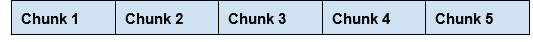

Each of these 5 chunks will serve as a test set. When Chunk 1 is the test set, we use the remaining 4 chunks as the training set. Thus we have 5 training and test sets as follows.

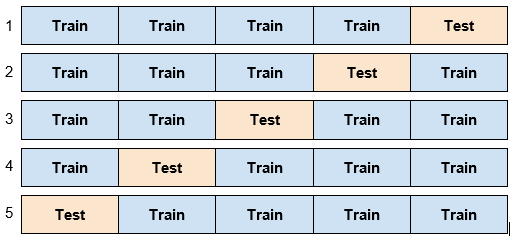

Each of the 5 times we have a test set of 20% (40 datapoints) and a training set of 80% (160 datapoints).

✅ Every datapoint is in exactly 1 test set.

### <b>Building and Evaluating with Multiple Training and Test Sets</b>

In the previous part we saw how we could make 5 test sets, each with a different training set.

Now, for each training set, we build a model and evaluate it using the associated test set. Thus we build 5 models and calculate 5 scores.

Let’s say we are trying to calculate the accuracy score for our model.

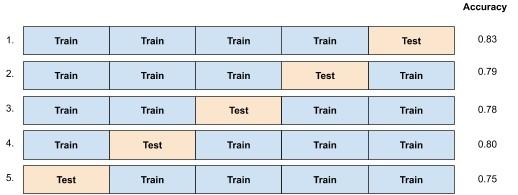

We report the accuracy as the mean of the 5 values:



```
(0.83+0.79+0.78+0.80+0.75)/5 = 0.79
```



If we had just done a single training and test set and had randomly gotten the first one, we would have reported an accuracy of 0.83. If we had randomly gotten the last one, we would have reported an accuracy of 0.75. Averaging all these possible values helps eliminate the impact of which test set a datapoint lands in.

You will only see values this different when you have a small dataset. With large datasets we often just do a training and test set for simplicity.

This process for creating multiple training and test sets is called <b>k-fold cross validation</b>. The k is the number of chunks we split our dataset into. The standard number is 5, as we did in our example above.

✅ Our goal in cross validation is to get accurate measures for our metrics (accuracy, precision, recall). We are building extra models in order to feel confident in the numbers we calculate and report.

### <b>Final Model Choice in k-fold Cross Validation</b>

Now we have built 5 models instead of just one. How do we decide on a single model to use?

These 5 models were built just for evaluation purposes, so that we can report the metric values. We don’t actually need these models and want to build the best possible model. The best possible model is going to be a model that uses all of the data. So we keep track of our calculated values for our evaluation metrics and then build a model using all of the data.

This may seem incredibly wasteful, but computers have a lot of computation power, so it’s worth using a little extra to make sure we’re reporting the right values for our evaluation metrics. We’ll be using these values to make decisions, so calculating them correctly is very important.

✅ Computation power for building a model can be a concern when the dataset is large. In these cases, we just do a train test split.

## k-fold Cross Validation in Sklearn

### <b>KFold Class</b>

Scikit-learn has already implemented the code to break the dataset into k chunks and create k training and test sets.

For simplicity, let’s take a dataset with just 6 datapoints and 2 features and a 3-fold cross validation on the dataset. We’ll take the first 6 rows from the Titanic dataset and use just the Age and Fare columns.



```
X = df[['Age', 'Fare']].values[:6]
y = df['Survived'].values[:6]
```



We start by instantiating a KFold class object. It takes two parameters: n_splits (this is k, the number of chunks to create) and shuffle (whether or not to randomize the order of the data). It’s generally good practice to shuffle the data since you often get a dataset that’s in a sorted order.



```
kf = KFold(n_splits=3, shuffle=True)
```



The KFold class has a split method that creates the 3 splits for our data.

Let’s look at the output of the split method. The split method returns a generator, so we use the list function to turn it into a list.



```
list(kf.split(X))
```



⏸ Run this code to see the results:

In [ ]:
from sklearn.model_selection import KFold
import pandas as pd

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
X = df[['Age', 'Fare']].values[:6]
y = df['Survived'].values[:6]

kf = KFold(n_splits=3, shuffle=True)
print(list(kf.split(X)))

As we can see, we have 3 training and testing sets as expected. The first training set is made up of datapoints 0, 2, 3, 5 and the test set is made up of datapoints 1, 4.

✅ The split is done randomly, so expect to see different datapoints in the sets each time you run the code.

### <b>Creating Training and Test Sets with the Folds</b>

We used the KFold class and split method to get the indices that are in each of the splits. Now let’s use that result to get our first (of 3) train/test splits.

First let’s pull out the first split.



```
splits = list(kf.split(X))
first_split = splits[0]
print(first_split)
# (array([0, 2, 3, 5]), array([1, 4]))
```



The first array is the indices for the training set and the second is the indices for the test set. Let’s create these variables.



```
train_indices, test_indices = first_split
print("training set indices:", train_indices)
print("test set indices:", test_indices)
# training set indices: [0, 2, 3, 5]
# test set indices: [1, 4]```



Now we can create an X_train, y_train, X_test, and y_test based on these indices.



```
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]
```



If we print each of these out, we’ll see that we have four of the datapoints in X_train and their target values in y_train. The remaining 2 datapoints are in X_test and their target values in y_test.



```
print("X_train")
print(X_train)
print("y_train", y_train)
print("X_test")
print(X_test)
print("y_test", y_test)
```



⏸ Run this code to see the results:

In [ ]:
from sklearn.model_selection import KFold
import pandas as pd
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
X = df[['Age', 'Fare']].values[:6]
y = df['Survived'].values[:6]

kf = KFold(n_splits=3, shuffle=True)

splits = list(kf.split(X))
first_split = splits[0]
train_indices, test_indices = first_split
print("training set indices:", train_indices)
print("test set indices:", test_indices)

X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]
print("X_train")
print(X_train)
print("y_train", y_train)
print("X_test")
print(X_test)
print("y_test", y_test)

✅ At this point, we have training and test sets in the same format as we did using the train_test_split function.

### <b>Build a Model</b>

Now we can use the training and test sets to build a model and make a prediction like before. Let’s go back to using the entire dataset (since 4 datapoints is not enough to build a decent model).

Here’s the entirety of the code to build and score the model on the first fold of a 5-fold cross validation. Note that the code for fitting and scoring the model is exactly the same as it was when we used the train_test_split function.

⏸ Try it now:

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import pandas as pd

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

kf = KFold(n_splits=5, shuffle=True)

splits = list(kf.split(X))
train_indices, test_indices = splits[0]
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

✅ So far, we’ve essentially done a single train/test split. In order to do a k-fold cross validation, we need to do use each of the other 4 splits to build a model and score the model.

### <b>Loop Over All the Folds</b>

We have been doing one fold at a time, but really we want to loop over all the folds to get all the values. We will put the code from the previous part inside our for loop.



```
scores = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)
# [0.75847, 0.83146, 0.85876, 0.76271, 0.74011]
```



Since we have 5 folds, we get 5 accuracy values. Recall, to get a single final value, we need to take the mean of those values.



```
print(np.mean(scores))
# 0.79029
```



Now that we’ve calculated the accuracy, we no longer need the 5 different models that we’ve built. For future use, we just want a single model. To get the single best possible model, we build a model on the whole dataset. If we’re asked the accuracy of this model, we use the accuracy calculated by cross validation (0.79029) even though we haven’t actually tested this particular model with a test set.

⏸ Run this code to see the results:

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

scores = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)
print(np.mean(scores))
final_model = LogisticRegression()
final_model.fit(X, y)

✅ Expect to get slightly different values every time you run the code. The KFold class is randomly splitting up the data each time, so a different split will result in different scores, though you should expect the average of the 5 scores to generally be about the same.

## Model Comparison

### <b>Comparing Different Models</b>

So far we’ve used our evaluation techniques to get scores for a single model. These techniques will become incredibly useful as we introduce more models and want to determine which one performs the best for a specific problem.

Let’s use our techniques to compare three models:
• A logistic regression model using all of the features in our dataset
• A logistic regression model using just the Pclass, Age, and Sex columns
• A logistic regression model using just the Fare and Age columns

We wouldn’t expect the second or third model to do better since it has less information, but we might determine that using just those two or three columns yields comparable performance to using all the columns.

✅ Evaluation techniques are essential for deciding between multiple model options.

### <b>Building the Models with Scikit-learn</b>

Let’s write the code to build the two models in scikit-learn. Then we’ll use k-fold cross validation to calculate the accuracy, precision, recall and F1 score for the two models so that we can compare them.

First, we import the necessary modules and prep the data as we’ve done before.



```
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
```



Now we can build the KFold object. We’ll use 5 splits as that’s standard. Note that we want to create a single KFold object that all of the models will use. It would be unfair if different models got a different split of the data.



```
kf = KFold(n_splits=5, shuffle=True)
```



Now we’ll create three different feature matrices X1, X2 and X3. All will have the same target y.



```
X1 = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
X2 = df[['Pclass', 'male', 'Age']].values
X3 = df[['Fare', 'Age']].values
y = df['Survived'].values
```



Since we’ll be doing it several times, let’s write a function to score the model. This function uses the KFold object to calculate the accuracy, precision, recall and F1 score for a Logistic Regression model with the given feature matrix X and target array y.

Then we call our function three times for each of our three feature matrices and see the results.

⏸ Run this code to see the results:

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'

kf = KFold(n_splits=5, shuffle=True)

X1 = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
X2 = df[['Pclass', 'male', 'Age']].values
X3 = df[['Fare', 'Age']].values
y = df['Survived'].values

def score_model(X, y, kf):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = LogisticRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
    print("accuracy:", np.mean(accuracy_scores))
    print("precision:", np.mean(precision_scores))
    print("recall:", np.mean(recall_scores))
    print("f1 score:", np.mean(f1_scores))

print("Logistic Regression with all features")
score_model(X1, y, kf)
print()
print("Logistic Regression with Pclass, Sex & Age features")
score_model(X2, y, kf)
print()
print("Logistic Regression with Fare & Age features")
score_model(X3, y, kf)

We’ll interpret these results in the next part.

✅ Expect to get slightly different results every time you run the code. The k-fold splits are chosen randomly, so there will be a little variation depending on what split each datapoint ends up in.

### <b>Choosing a Best Model</b>

Let’s look at the results from the previous part.



```
Logistic Regression with all features
accuracy: 0.7959055418015616
precision: 0.764272127669388
recall: 0.6783206767486641
f1 score: 0.7163036778464393

Logistic Regression with Pclass, Sex & Age features
accuracy: 0.7981908207960389
precision: 0.7715749823848419
recall: 0.6830371999703425
f1 score: 0.7232930032930033

Logistic Regression with Fare & Age features
accuracy: 0.6538944962864216
precision: 0.6519918328980114
recall: 0.23722965720416847
f1 score: 0.34438594236494796
```



If we compare the first two models, they have almost identical scores. The third model has lower scores for all four metrics. The first two are thus much better options than the third. This matches intuition since the third model doesn’t have access to the sex of the passenger. Our expectation is that women are more likely to survive, so having the sex would be a very valuable predictor.

Since the first two models have equivalent results, it makes sense to choose the simpler model, the one that uses the Pclass, Sex & Age features.

Now that we’ve made a choice of a best model, we build a single final model using all of the data.



```
model = LogisticRegression()
model.fit(X1, y)
```



Now we can make a prediction with our model.

⏸ Run this code to see the results:

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'

kf = KFold(n_splits=5, shuffle=True)

X1 = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
X2 = df[['Pclass', 'male', 'Age']].values
X3 = df[['Fare', 'Age']].values
y = df['Survived'].values

def score_model(X, y, kf):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = LogisticRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
    print("accuracy:", np.mean(accuracy_scores))
    print("precision:", np.mean(precision_scores))
    print("recall:", np.mean(recall_scores))
    print("f1 score:", np.mean(f1_scores))

print("Logistic Regression with all features")
score_model(X1, y, kf)
print()
print("Logistic Regression with Pclass, Sex & Age features")
score_model(X2, y, kf)
print()
print("Logistic Regression with Fare & Age features")
score_model(X3, y, kf)

model = LogisticRegression()
model.fit(X1, y)

print(model.predict([[3, False, 25, 0, 1, 2]]))

✅ We have only tried three different combinations of features. It’s possible a different combination would also work.

# **Contact us** 


🅾[Please visit our GitHub for more Nootebooks](https://github.com/Other-Ways/Logistic-Regression)

🅾[Please visit our Youtube Channel for more Explanations](https://www.youtube.com/channel/UCQvHkW_OVcb70Hrmx-YBZ4w)

🅾[Please visit our Facebook Group for more Posts](https://www.facebook.com/groups/5561422427252705/)

🅾[Please visit our Linkedin profile for more Posts](https://www.linkedin.com/company/other-ways25/)